In [1]:

import pandas as pd
import json
from pandas.io.json import json_normalize  
import numpy as np
from tabulate import tabulate

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
def stats_analysis(dft,name="default"):
    df2, df3 = dft
#     df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
#     df3 = df2.loc[~df2.index.str.contains("None")]
    # extract time_access dict to data fram
    df_time_access = pd.DataFrame(df3.ta.values.tolist(), index=df3.index.values)
    df_time_access = df_time_access.fillna(0)
    
    # counts accesses to edges
    counts = df_time_access.values.flatten()
#     counts2 = counts[(counts>0) & (counts<120)]
    counts2 = counts[(counts>0)]
    
    ratios = []
    cl = len(counts2)
    for i in range(1, 11):
        ratios.append(len(counts2[counts2==i])/cl)
        
        
    step_groupings = []
    cs = sum(counts2)
    for i in range(0, 21):
        step_groupings.append((i, sum(counts2[counts2>i])/cs))
        
    step_groupings = np.array(step_groupings)
    l1, l2 = zip(*step_groupings)
    print("How many edges had more than X visits in the same step")
    print(tabulate(step_groupings))
    
    
    step_groupings_pd = pd.DataFrame()
    step_groupings_pd['bound'] = l1
    step_groupings_pd['fraction'] = l2

    print("avg per step")
    print(np.average(counts2))
    
    
    print("median per step")
    print(np.median(counts2))
    
    plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
    plt.xlabel("visits per step")
    plt.ylabel("fraction of total visits")

    plt.show()
    
    
    plt.bar(range(1,11), np.array(ratios))
    plt.xlabel("traversals per step")
    plt.ylabel("fraction of total traversals")
    plt.title(f"visits per step concurrent walks={name}")
    nodot = name.replace('.', '')
    plt.savefig(f"f_traversal_{nodot}.pdf")
    
    
    plt.hist(counts2, bins=int(max(counts2)))
    plt.xlabel("traversals per step")
    plt.ylabel("count")
    plt.show()
    
    
    plt.plot(df2.groupby('sn').mean()['c'])
    plt.xlabel("count of traversals")
    plt.ylabel("source node neighbors")
    plt.show()
    
    
    count_mean = df2.groupby('sn').mean()['c']
    count_mean_limit_200 = count_mean[count_mean.index < 200]
    count_mean_limit_50 = count_mean[count_mean.index < 50]
    count_mean_limit_10 = count_mean[count_mean.index < 10]
    
    
    plt.plot(count_mean_limit_200)
    plt.title("count_mean_limit_200")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_50)
    plt.title("count_mean_limit_50")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_10)
    plt.title("count_mean_limit_10")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    tn_count = df2.groupby('tn').mean()['c']
    plt.plot(tn_count)
    plt.title("target count")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    plt.plot(tn_count[tn_count.index < 200])
    plt.title("target count limit 200")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    print("count mean")
    print(df2['c'].mean())
    print("count max")
    print(max(df2['c']))
    
    
    count_groups = df2.groupby('c').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['c']), 5):
        groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("visits per node")
    plt.ylabel("fraction of nodes with at least x visits")
#     plt.show()
    plt.title("Visits in total")
    plt.savefig("visits.pdf")
        
    
    sn_groups = df2.groupby('sn').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['sn']), 5):
        groupings_percentages.append((i, sum(sn_groups[sn_groups.index >= i])/sum(sn_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("edges on nodes")
    plt.ylabel("fraction of total edges")
    plt.show()
    
    
    plt.plot(df2.groupby('c').size())
    plt.xlabel("visits per edge")
    plt.ylabel("number of occurrences")
    plt.show()
    
    count_groups = df2.groupby('c').size()
    count_groups_500 = count_groups[count_groups < 500]
    count_groups[count_groups < 10]

In [4]:
def stat_analysis2(df):
    
    return df

In [5]:
def read_df(path):
    return pd.read_json(path)

In [6]:
def read_df_series(path):
    import json
    with open(path, 'r') as f:
        data = json.load(f)
        return pd.DataFrame({'data': data})

In [7]:
def extract_stats(df):
    df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
    return df2, df2.loc[~df2.index.str.contains("None")]

In [8]:
df_edge_32_100_2_0 = read_df("data_exp/bias_edge_32_100_2_0.json")
df_edge_32_100_2_02 = read_df("data_exp/bias_edge_32_100_2_0.2.json")
df_edge_32_100_2_04 = read_df("data_exp/bias_edge_32_100_2_0.4.json")
df_edge_32_100_2_06 = read_df("data_exp/bias_edge_32_100_2_0.6.json")
df_edge_32_100_2_08 = read_df("data_exp/bias_edge_32_100_2_0.8.json")

In [ ]:
df_nodes_32_100_2_0 = read_df("data_exp/bias_nodes_32_100_0.json")
df_nodes_32_100_2_02 = read_df("data_exp/bias_nodes_32_100_0.2.json")
df_nodes_32_100_2_04 = read_df("data_exp/bias_nodes_32_100_0.4.json")
df_nodes_32_100_2_06 = read_df("data_exp/bias_nodes_32_100_0.6.json")
df_nodes_32_100_2_08 = read_df("data_exp/bias_nodes_32_100_0.8.json")

In [100]:
df_three_32_100_2_0 = read_df_series("data_exp/three_count_32_100_2_0.json")
df_three_32_100_2_02 = read_df_series("data_exp/three_count_32_100_2_0.2.json")
df_three_32_100_2_04 = read_df_series("data_exp/three_count_32_100_2_0.4.json")
df_three_32_100_2_06 = read_df_series("data_exp/three_count_32_100_2_0.6.json")
df_three_32_100_2_08 = read_df_series("data_exp/three_count_32_100_2_0.8.json")

In [101]:
df_four_32_100_2_0 = read_df_series("data_exp/four_count_32_100_2_0.json")
df_four_32_100_2_02 = read_df_series("data_exp/four_count_32_100_2_0.2.json")
df_four_32_100_2_04 = read_df_series("data_exp/four_count_32_100_2_0.4.json")
df_four_32_100_2_06 = read_df_series("data_exp/four_count_32_100_2_0.6.json")
df_four_32_100_2_08 = read_df_series("data_exp/four_count_32_100_2_0.8.json")

In [85]:
df_edge_32_100_4096_0 = read_df("data_exp/bias_edge_32_100_4096_0.json")
df_edge_32_100_4096_02 = read_df("data_exp/bias_edge_32_100_4096_0.2.json")
df_edge_32_100_4096_04 = read_df("data_exp/bias_edge_32_100_4096_0.4.json")
df_edge_32_100_4096_06 = read_df("data_exp/bias_edge_32_100_4096_0.6.json")
df_edge_32_100_4096_08 = read_df("data_exp/bias_edge_32_100_4096_0.8.json")

In [86]:
df_edge_32_100_16_0 = read_df("data_exp/bias_edge_32_100_16_0.json")
df_edge_32_100_16_02 = read_df("data_exp/bias_edge_32_100_16_0.2.json")
df_edge_32_100_16_04 = read_df("data_exp/bias_edge_32_100_16_0.4.json")
df_edge_32_100_16_06 = read_df("data_exp/bias_edge_32_100_16_0.6.json")
df_edge_32_100_16_08 = read_df("data_exp/bias_edge_32_100_16_0.8.json")

In [9]:
df_edge_32_100_2_0s = extract_stats(df_edge_32_100_2_0)
df_edge_32_100_2_02s = extract_stats(df_edge_32_100_2_02)
df_edge_32_100_2_04s = extract_stats(df_edge_32_100_2_04)
df_edge_32_100_2_06s = extract_stats(df_edge_32_100_2_06)
df_edge_32_100_2_08s = extract_stats(df_edge_32_100_2_08)

In [87]:
df_edge_32_100_16_0s = extract_stats(df_edge_32_100_16_0)
df_edge_32_100_16_08s = extract_stats(df_edge_32_100_16_08)
df_edge_32_100_4096_0s = extract_stats(df_edge_32_100_4096_0)
df_edge_32_100_4096_08s = extract_stats(df_edge_32_100_4096_08)

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.0510904
 2  0.0103546
 3  0.00565295
 4  0.00380123
 5  0.00280274
 6  0.00215697
 7  0.00170321
 8  0.00140689
 9  0.00118115
10  0.00102757
11  0.00088056
12  0.000779268
13  0.000700017
14  0.000617951
15  0.000545851
16  0.000480199
17  0.000410443
18  0.000359797
19  0.000326385
20  0.000312317
--  -----------
avg per step
1.0239025917950935
median per step
1.0


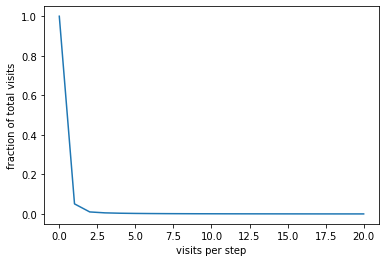

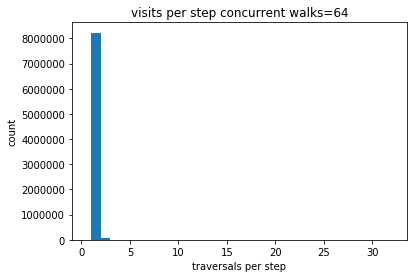

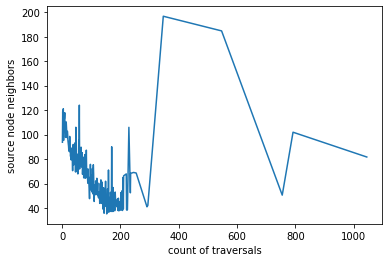

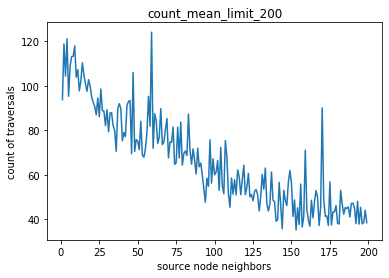

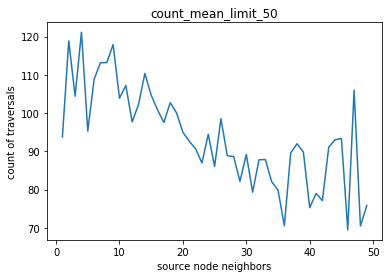

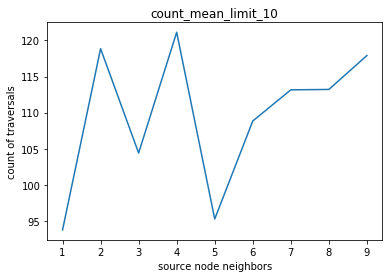

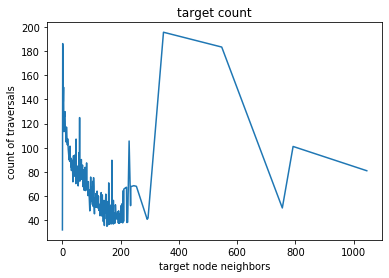

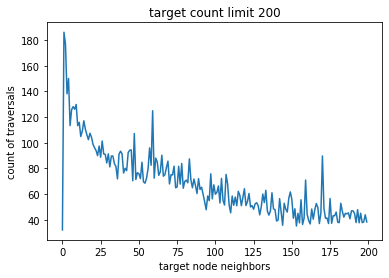

count mean
70.8867356944606
count max
618
--  ---------  ---
 6  0.947719    31
 7  0.860814    36
 8  0.781277    41
 9  0.702078    46
10  0.629217    51
11  0.561601    56
12  0.494923    61
13  0.431202    66
14  0.371415    71
15  0.316409    76
16  0.267707    81
17  0.227387    86
18  0.194857    91
19  0.168863    96
20  0.150133   101
21  0.136914   106
22  0.126538   111
23  0.119037   116
24  0.112278   121
25  0.106278   126
26  0.100002   131
27  0.0935919  136
28  0.0867169  141
29  0.0796423  146
30  0.0721302  151
31  0.0645681  156
32  0.0564466  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

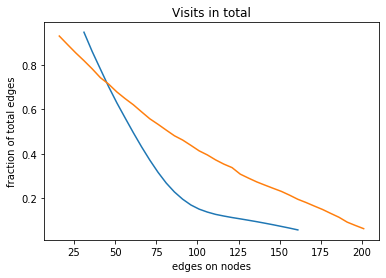

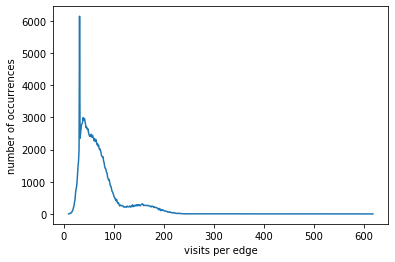

In [96]:
stats_analysis(df_edge_32_100_16_0s, "64")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.0510904
 2  0.0103546
 3  0.00565295
 4  0.00380123
 5  0.00280274
 6  0.00215697
 7  0.00170321
 8  0.00140689
 9  0.00118115
10  0.00102757
11  0.00088056
12  0.000779268
13  0.000700017
14  0.000617951
15  0.000545851
16  0.000480199
17  0.000410443
18  0.000359797
19  0.000326385
20  0.000312317
--  -----------
avg per step
1.0239025917950935
median per step
1.0


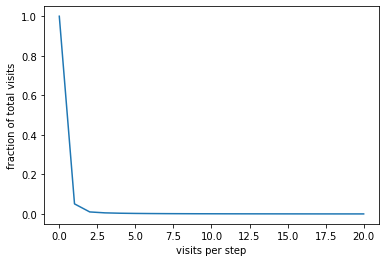

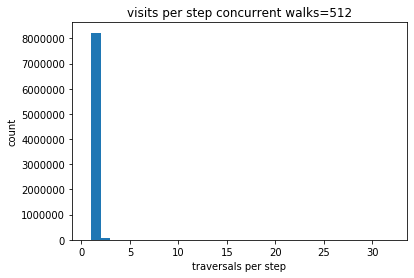

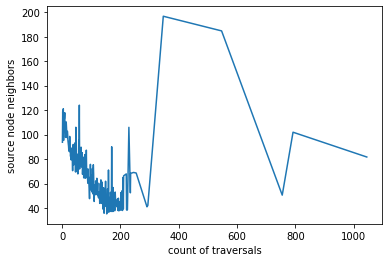

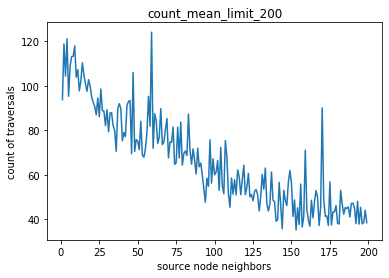

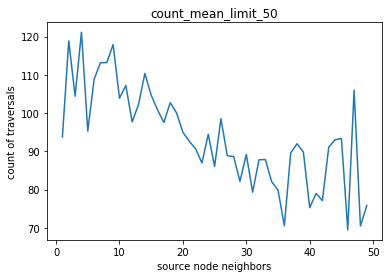

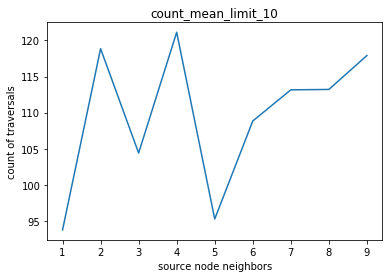

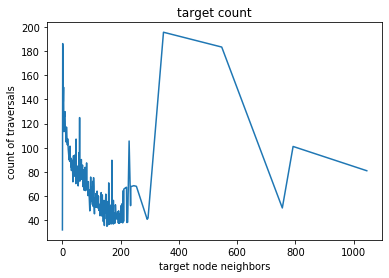

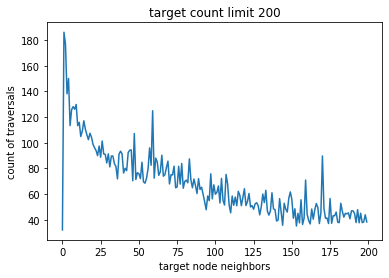

count mean
70.8867356944606
count max
618
--  ---------  ---
 6  0.947719    31
 7  0.860814    36
 8  0.781277    41
 9  0.702078    46
10  0.629217    51
11  0.561601    56
12  0.494923    61
13  0.431202    66
14  0.371415    71
15  0.316409    76
16  0.267707    81
17  0.227387    86
18  0.194857    91
19  0.168863    96
20  0.150133   101
21  0.136914   106
22  0.126538   111
23  0.119037   116
24  0.112278   121
25  0.106278   126
26  0.100002   131
27  0.0935919  136
28  0.0867169  141
29  0.0796423  146
30  0.0721302  151
31  0.0645681  156
32  0.0564466  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

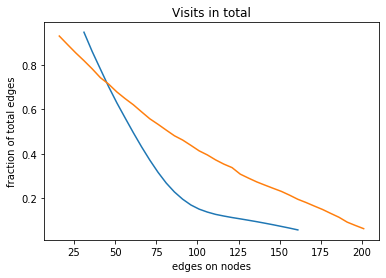

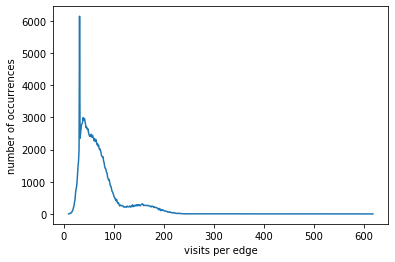

In [97]:
stats_analysis(df_edge_32_100_16_0s, "512")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.740552
 2  0.479239
 3  0.29918
 4  0.186792
 5  0.118424
 6  0.0761362
 7  0.0499743
 8  0.0335697
 9  0.0230595
10  0.0158944
11  0.0111953
12  0.0081227
13  0.00584435
14  0.00435242
15  0.00325252
16  0.00243
17  0.00186044
18  0.00142858
19  0.00110654
20  0.000867639
--  -----------
avg per step
1.9321204853486798
median per step
1.0


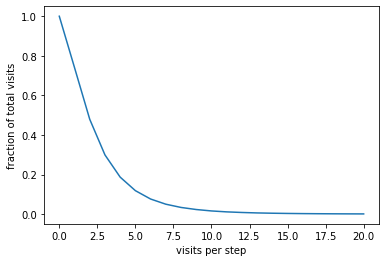

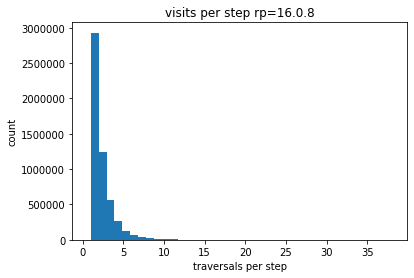

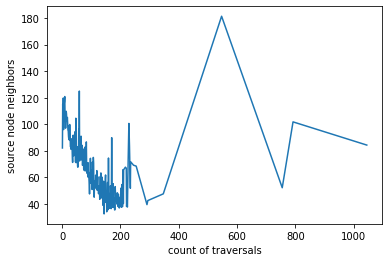

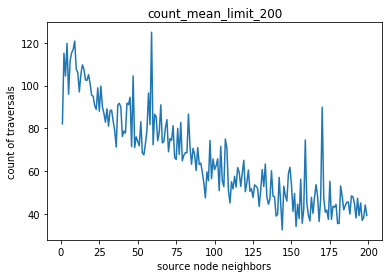

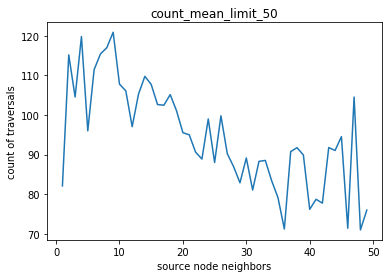

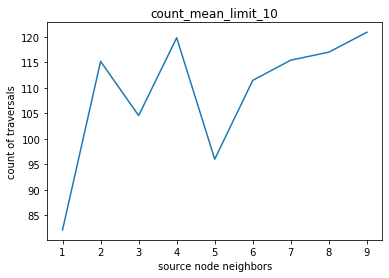

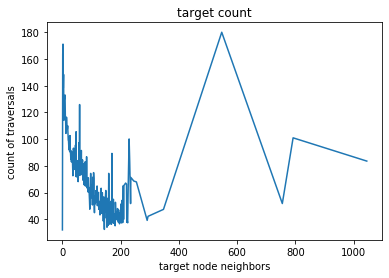

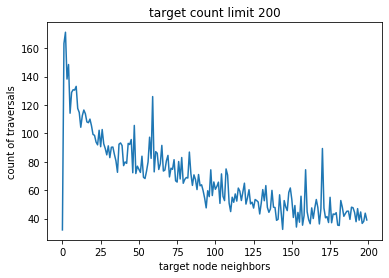

count mean
70.90401910640962
count max
687
--  ---------  ---
 4  0.936186    21
 5  0.895824    26
 6  0.84829     31
 7  0.772075    36
 8  0.713116    41
 9  0.653076    46
10  0.59467     51
11  0.536609    56
12  0.482697    61
13  0.431817    66
14  0.38568     71
15  0.342646    76
16  0.304262    81
17  0.270404    86
18  0.240393    91
19  0.21354     96
20  0.191009   101
21  0.170905   106
22  0.153522   111
23  0.137701   116
24  0.124513   121
25  0.112693   126
26  0.102653   131
27  0.09331    136
28  0.084987   141
29  0.07775    146
30  0.0706793  151
31  0.0640852  156
32  0.0582446  161
33  0.0527698  166
--  ---------  ---
--  ---------  ---
 3  0.930584    16
 4  0.892288    21
 5  0.854641    26
 6  0.819536    31
 7  0.782637    36
 8  0.742701    41
 9  0.713814    46
10  0.678455    51
11  0.648482    56
12  0.620759    61
13  0.588841    66
14  0.557544    71
15  0.532674    76
16  0.506453    81
17  0.480786    86
18  0.461563    91
19  0.43763     96
20  0.4

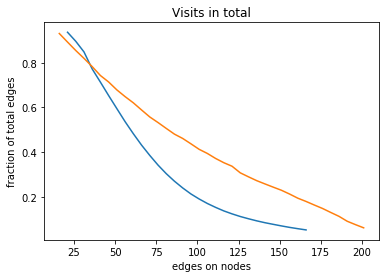

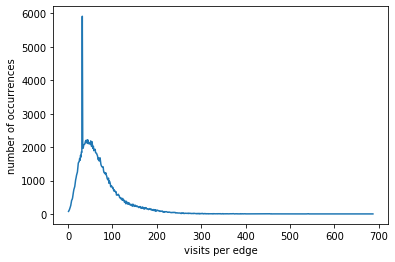

In [89]:
stats_analysis(df_edge_32_100_16_08s, "16.0.8")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.575251
 2  0.257022
 3  0.104602
 4  0.0422553
 5  0.0179898
 6  0.00842487
 7  0.00435628
 8  0.00244254
 9  0.00148757
10  0.00101308
11  0.000765575
12  0.000609254
13  0.000516883
14  0.000437302
15  0.00037809
16  0.00034651
17  0.000300877
18  0.000263929
19  0.000238428
20  0.000211585
--  -----------
avg per step
1.5203424037157591
median per step
1.0


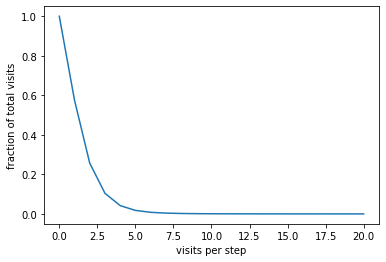

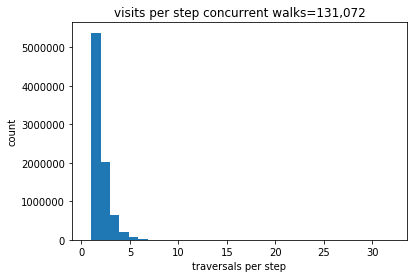

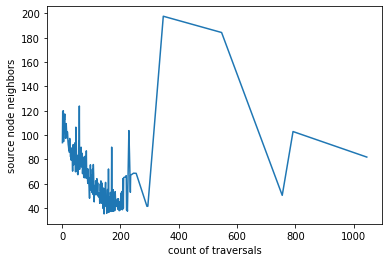

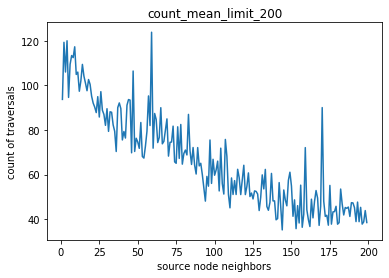

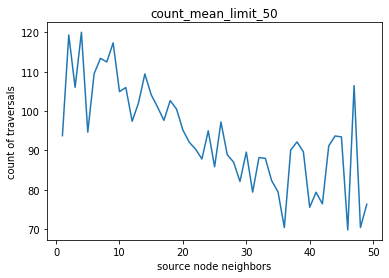

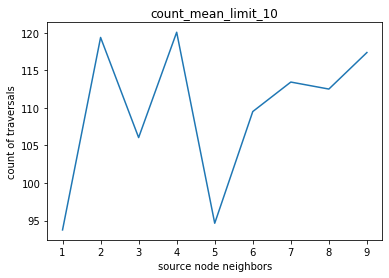

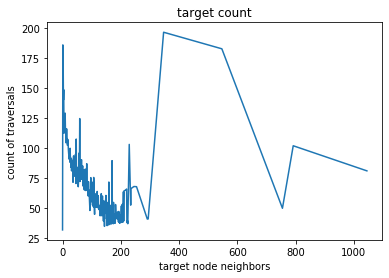

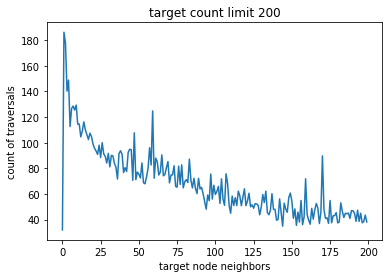

count mean
70.8867356944606
count max
599
--  ---------  ---
 6  0.948966    31
 7  0.863003    36
 8  0.781942    41
 9  0.700748    46
10  0.628319    51
11  0.559712    56
12  0.493931    61
13  0.430981    66
14  0.370612    71
15  0.315932    76
16  0.267087    81
17  0.22665     86
18  0.194153    91
19  0.168824    96
20  0.15005    101
21  0.136144   106
22  0.126339   111
23  0.119225   116
24  0.112627   121
25  0.106616   126
26  0.100495   131
27  0.0941903  136
28  0.0871047  141
29  0.0796645  146
30  0.0722964  151
31  0.0645294  156
32  0.0571723  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

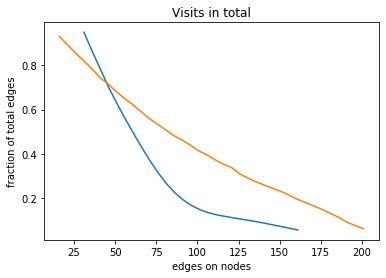

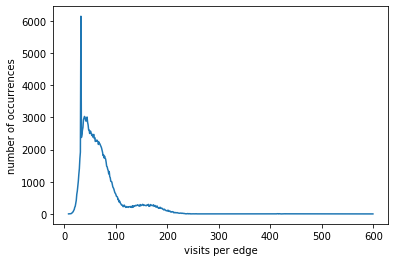

In [98]:
stats_analysis(df_edge_32_100_4096_0s, "131,072")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.575251
 2  0.257022
 3  0.104602
 4  0.0422553
 5  0.0179898
 6  0.00842487
 7  0.00435628
 8  0.00244254
 9  0.00148757
10  0.00101308
11  0.000765575
12  0.000609254
13  0.000516883
14  0.000437302
15  0.00037809
16  0.00034651
17  0.000300877
18  0.000263929
19  0.000238428
20  0.000211585
--  -----------
avg per step
1.5203424037157591
median per step
1.0


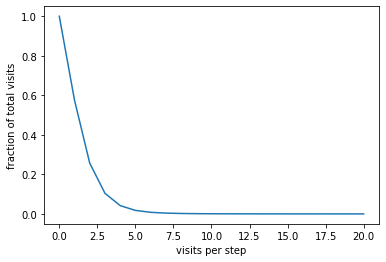

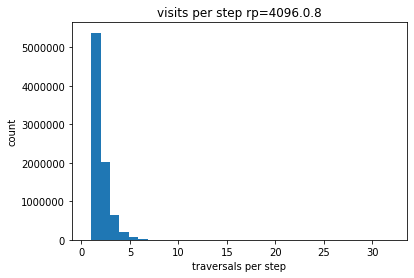

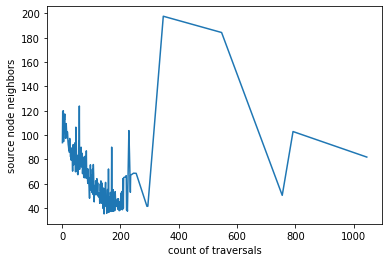

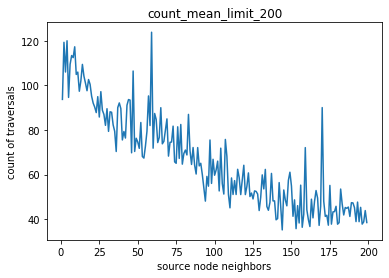

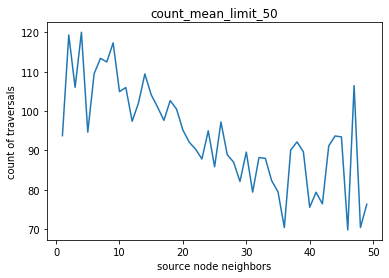

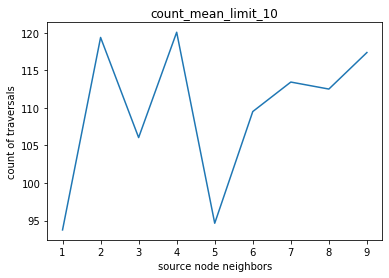

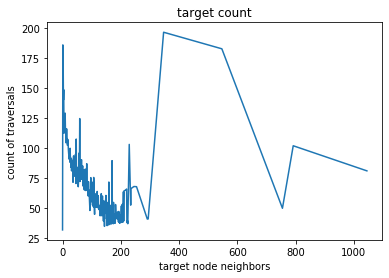

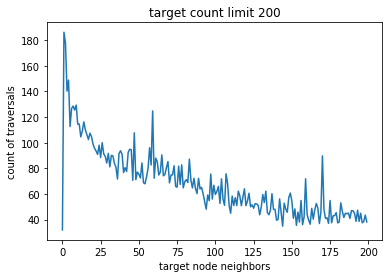

count mean
70.8867356944606
count max
599
--  ---------  ---
 6  0.948966    31
 7  0.863003    36
 8  0.781942    41
 9  0.700748    46
10  0.628319    51
11  0.559712    56
12  0.493931    61
13  0.430981    66
14  0.370612    71
15  0.315932    76
16  0.267087    81
17  0.22665     86
18  0.194153    91
19  0.168824    96
20  0.15005    101
21  0.136144   106
22  0.126339   111
23  0.119225   116
24  0.112627   121
25  0.106616   126
26  0.100495   131
27  0.0941903  136
28  0.0871047  141
29  0.0796645  146
30  0.0722964  151
31  0.0645294  156
32  0.0571723  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

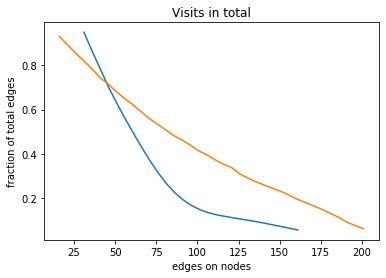

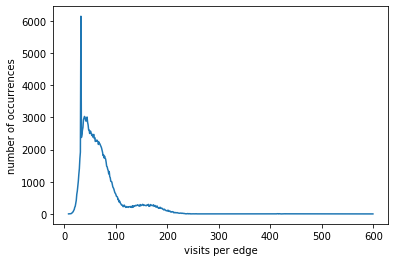

In [91]:
stats_analysis(df_edge_32_100_4096_0s, "4096.0.8")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.0185643
 2  0.00721094
 3  0.00481292
 4  0.00345235
 5  0.00263949
 6  0.00204574
 7  0.00166961
 8  0.00142335
 9  0.00118583
10  0.00101464
11  0.000908717
12  0.00078746
13  0.000700915
14  0.000622693
15  0.000546015
16  0.000481344
17  0.000416674
18  0.000378157
19  0.000342017
20  0.000308731
--  -----------
avg per step
1.0100631972746545
median per step
1.0


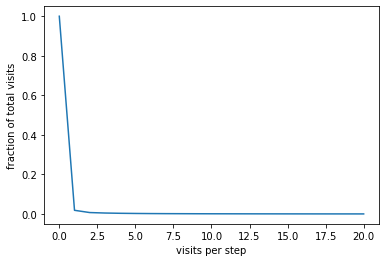

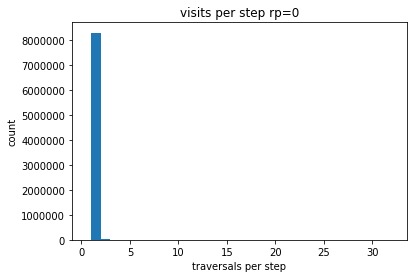

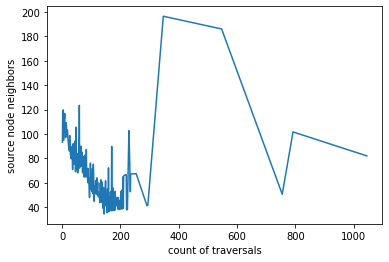

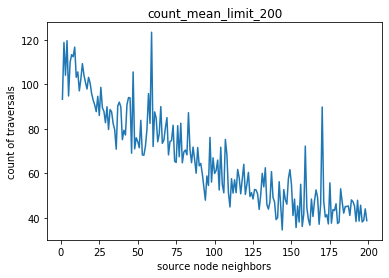

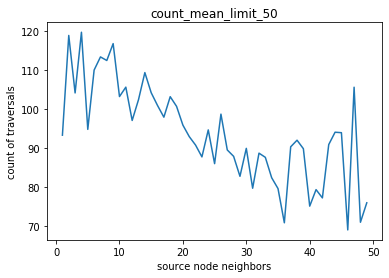

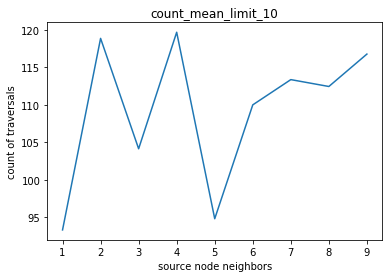

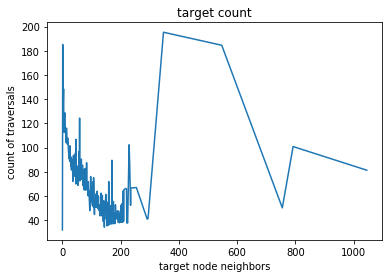

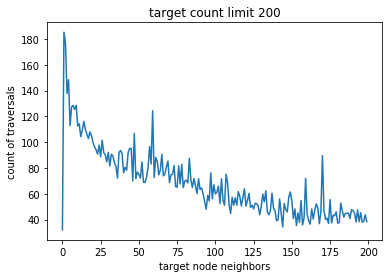

count mean
70.8867356944606
count max
627
--  ---------  ---
 6  0.94808     31
 7  0.861789    36
 8  0.780607    41
 9  0.700815    46
10  0.628269    51
11  0.559906    56
12  0.49346     61
13  0.429429    66
14  0.370451    71
15  0.315982    76
16  0.267879    81
17  0.226878    86
18  0.193671    91
19  0.168143    96
20  0.150027   101
21  0.136333   106
22  0.126737   111
23  0.119054   116
24  0.112904   121
25  0.106611   126
26  0.10055    131
27  0.0943066  136
28  0.0875202  141
29  0.0801853  146
30  0.0726011  151
31  0.0651554  156
32  0.0574382  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

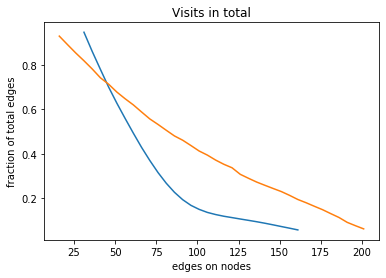

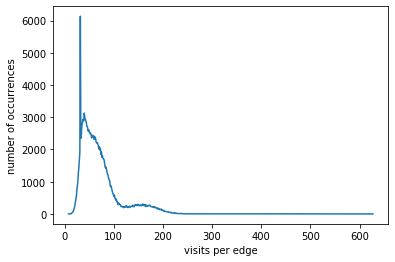

In [72]:
stats_analysis(df_edge_32_100_2_0s, "0")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.0728362
 2  0.00925386
 3  0.00505033
 4  0.00350313
 5  0.00262881
 6  0.00206779
 7  0.00165675
 8  0.00141571
 9  0.00117949
10  0.00102056
11  0.000907898
12  0.000779342
13  0.000682925
14  0.000603814
15  0.000533178
16  0.000480437
17  0.000422399
18  0.00037366
19  0.000331162
20  0.000305262
--  -----------
avg per step
1.0328951752348676
median per step
1.0


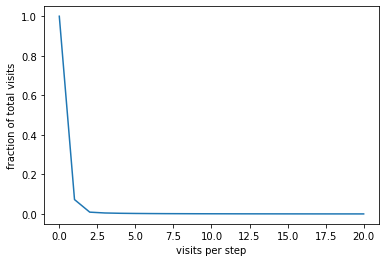

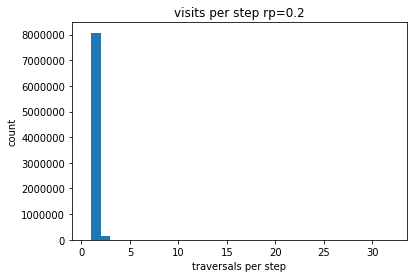

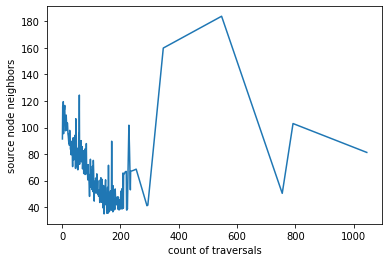

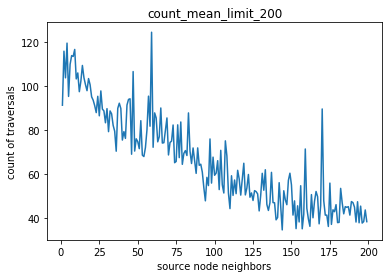

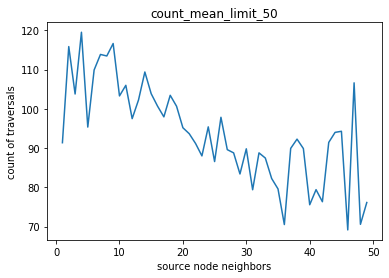

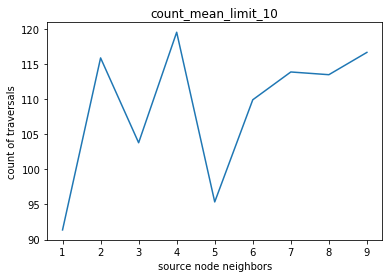

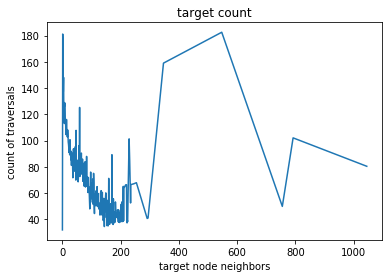

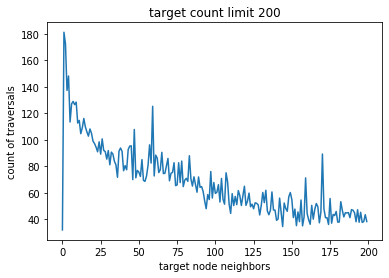

count mean
70.8867356944606
count max
586
--  ---------  ---
 6  0.938772    31
 7  0.853341    36
 8  0.77648     41
 9  0.69912     46
10  0.626009    51
11  0.557441    56
12  0.491294    61
13  0.429097    66
14  0.371731    71
15  0.319096    76
16  0.272294    81
17  0.233581    86
18  0.20033     91
19  0.174453    96
20  0.154482   101
21  0.140272   106
22  0.12933    111
23  0.120222   116
24  0.113043   121
25  0.106594   126
26  0.100124   131
27  0.0934867  136
28  0.0866282  141
29  0.0791881  146
30  0.0717645  151
31  0.0640917  156
32  0.0565684  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

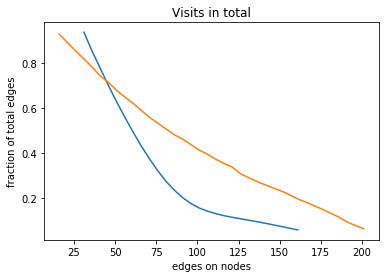

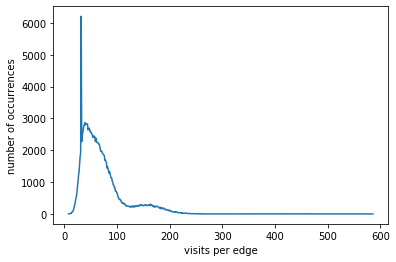

In [73]:
stats_analysis(df_edge_32_100_2_02s, "0.2")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.147076
 2  0.0186582
 3  0.00665949
 4  0.00391423
 5  0.00269699
 6  0.00206084
 7  0.00165849
 8  0.00139649
 9  0.00116441
10  0.00100059
11  0.000874064
12  0.000759737
13  0.000687237
14  0.000612414
15  0.000530503
16  0.000472875
17  0.000415596
18  0.000371677
19  0.000340772
20  0.000305916
--  -----------
avg per step
1.0700897070450115
median per step
1.0


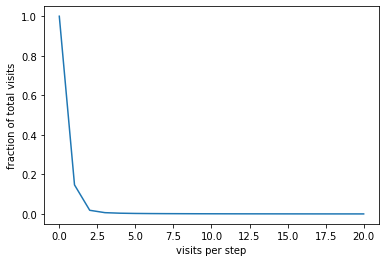

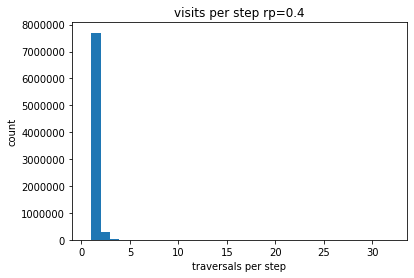

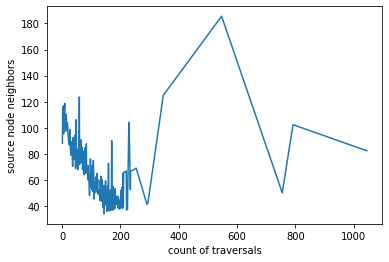

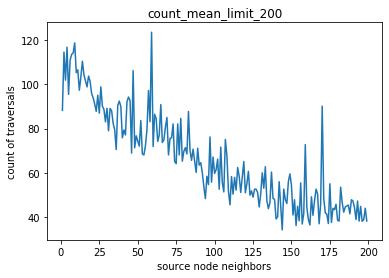

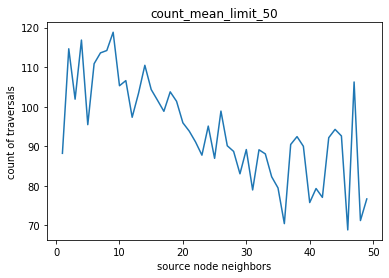

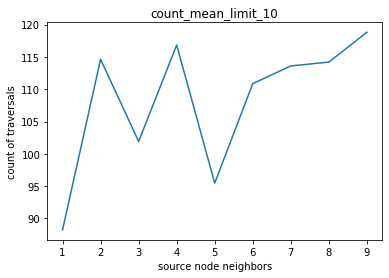

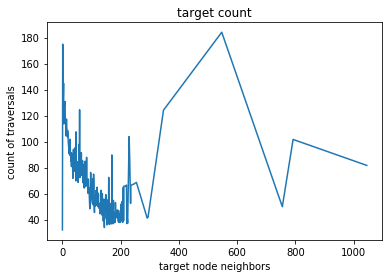

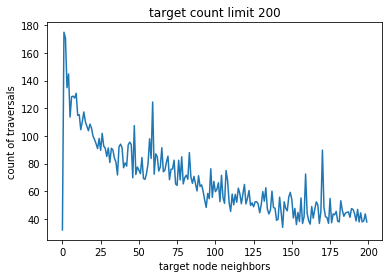

count mean
70.8867356944606
count max
624
--  ---------  ---
 6  0.922025    31
 7  0.839857    36
 8  0.768945    41
 9  0.694278    46
10  0.623217    51
11  0.55569     56
12  0.491056    61
13  0.429269    66
14  0.372202    71
15  0.321417    76
16  0.276144    81
17  0.238074    86
18  0.206535    91
19  0.181201    96
20  0.160614   101
21  0.144371   106
22  0.131873   111
23  0.12148    116
24  0.112777   121
25  0.105248   126
26  0.0980239  131
27  0.0910159  136
28  0.0839081  141
29  0.0770607  146
30  0.0700139  151
31  0.063305   156
32  0.0564687  161
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.35

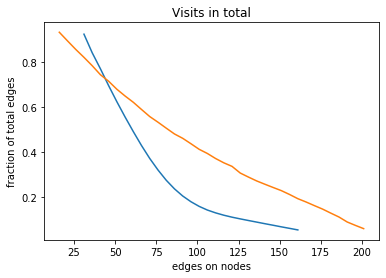

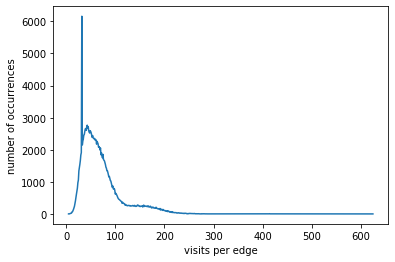

In [74]:
stats_analysis(df_edge_32_100_2_04s, "0.4")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.257337
 2  0.0474538
 3  0.0144814
 4  0.00641697
 5  0.00369632
 6  0.00247312
 7  0.00183138
 8  0.00143773
 9  0.00116593
10  0.00100461
11  0.000864705
12  0.00076797
13  0.000670497
14  0.000594154
15  0.000532808
16  0.000463736
17  0.000421247
18  0.000374215
19  0.00032457
20  0.000297304
--  -----------
avg per step
1.13856166347677
median per step
1.0


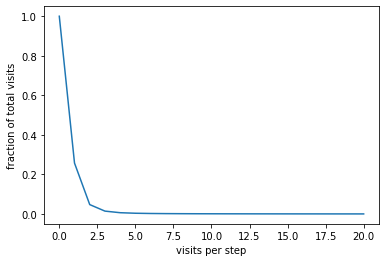

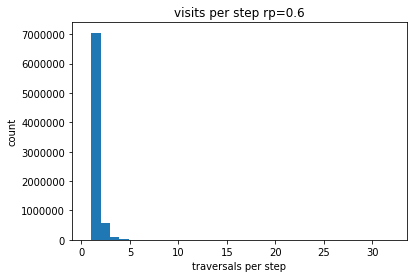

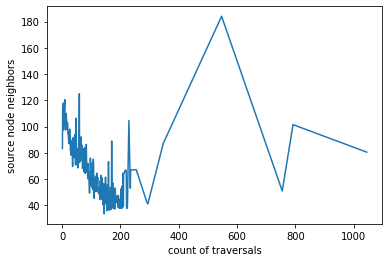

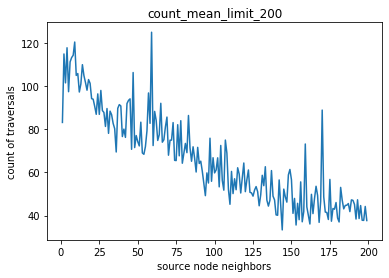

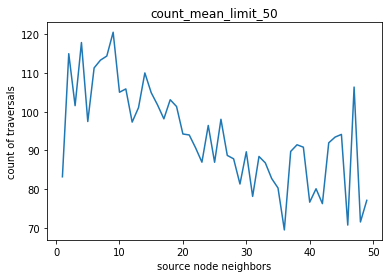

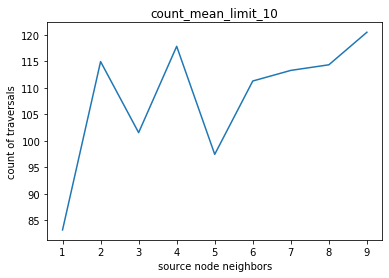

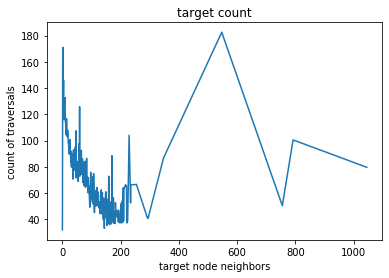

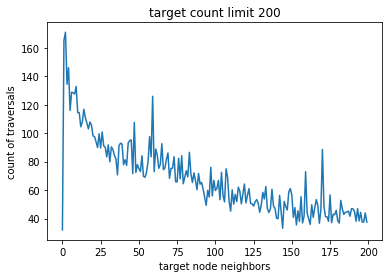

count mean
70.8867356944606
count max
657
--  ---------  ---
 5  0.945509    26
 6  0.900807    31
 7  0.820949    36
 8  0.756707    41
 9  0.687807    46
10  0.620026    51
11  0.553186    56
12  0.489532    61
13  0.429756    66
14  0.37511     71
15  0.326752    76
16  0.284011    81
17  0.24742     86
18  0.216285    91
19  0.189959    96
20  0.167811   101
21  0.150365   106
22  0.135829   111
23  0.124023   116
24  0.113768   121
25  0.104716   126
26  0.0968937  131
27  0.0892486  136
28  0.0823181  141
29  0.075576   146
30  0.0690167  151
31  0.0626679  156
32  0.0562693  161
33  0.0503914  166
--  ---------  ---
--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.39

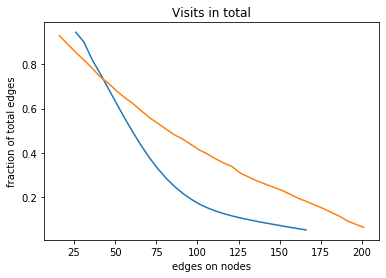

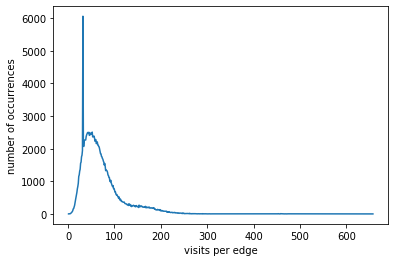

In [75]:
stats_analysis(df_edge_32_100_2_06s, "0.6")

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.450883
 2  0.149845
 3  0.0570913
 4  0.0251422
 5  0.0124633
 6  0.00686962
 7  0.00414052
 8  0.00274052
 9  0.00195346
10  0.00146268
11  0.0011813
12  0.00095681
13  0.000820831
14  0.000681964
15  0.000577378
16  0.000464017
17  0.000388043
18  0.000323297
19  0.000300515
20  0.000285255
--  -----------
avg per step
1.3139208119000854
median per step
1.0


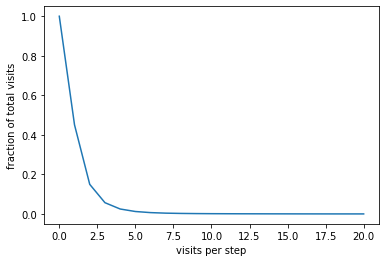

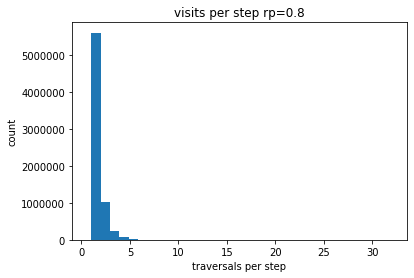

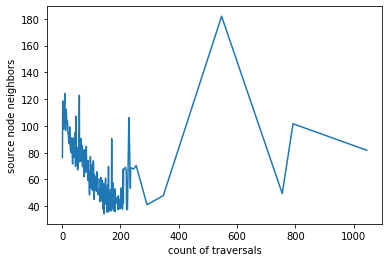

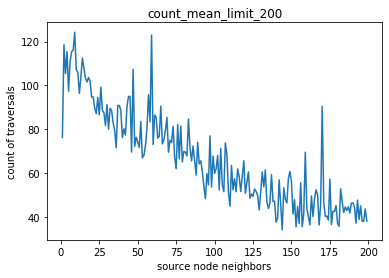

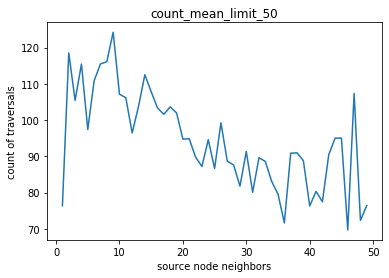

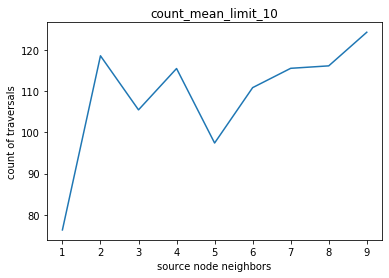

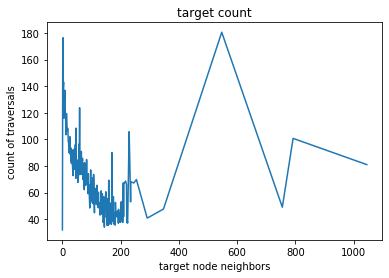

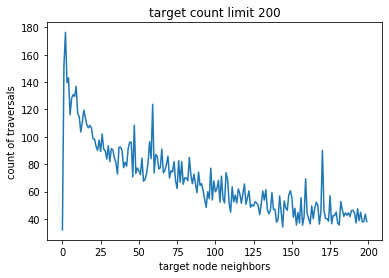

count mean
70.89773325428443
count max
803
--  ---------  ---
 4  0.934524    21
 5  0.895445    26
 6  0.847932    31
 7  0.771442    36
 8  0.713202    41
 9  0.653622    46
10  0.59403     51
11  0.536766    56
12  0.482455    61
13  0.432172    66
14  0.384654    71
15  0.342306    76
16  0.304434    81
17  0.270281    86
18  0.239939    91
19  0.213886    96
20  0.190715   101
21  0.17069    106
22  0.153386   111
23  0.13785    116
24  0.124569   121
25  0.11265    126
26  0.102101   131
27  0.0932352  136
28  0.084985   141
29  0.0772888  146
30  0.0703073  151
31  0.0639465  156
32  0.0582949  161
33  0.052815   166
--  ---------  ---
--  ---------  ---
 3  0.930585    16
 4  0.892287    21
 5  0.854637    26
 6  0.819525    31
 7  0.78264     36
 8  0.742712    41
 9  0.713817    46
10  0.678461    51
11  0.648491    56
12  0.62077     61
13  0.58885     66
14  0.55755     71
15  0.532677    76
16  0.506458    81
17  0.480793    86
18  0.461561    91
19  0.437635    96
20  0.4

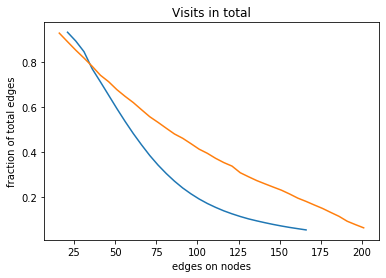

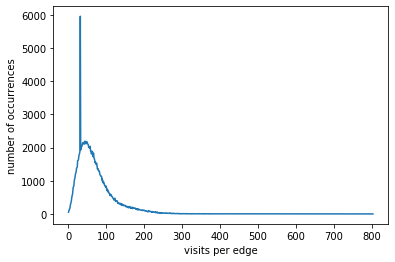

In [76]:
stats_analysis(df_edge_32_100_2_08s, "0.8")

In [ ]:
df = read_df("data/stats_120_80_1.json")
dfe_120_80_1 = extract_stats(df)

--  ----------
 0  1
 1  0.0431653
 2  0.0320198
 3  0.027237
 4  0.0235433
 5  0.0204606
 6  0.0180117
 7  0.0159588
 8  0.0142373
 9  0.0128139
10  0.0115523
11  0.0104392
12  0.00950513
13  0.00870748
14  0.00798958
15  0.007368
16  0.00685986
17  0.00637435
18  0.00591789
19  0.00554094
20  0.00520015
--  ----------
avg per step
1.033759247606491
median per step
1.0


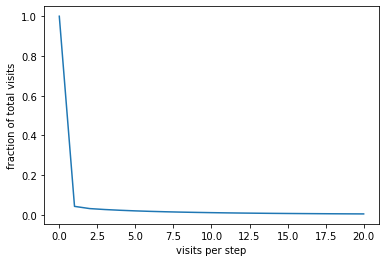

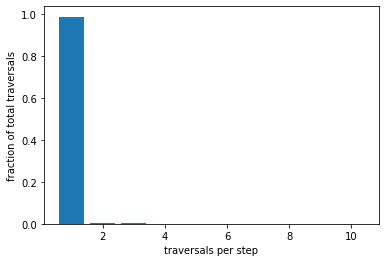

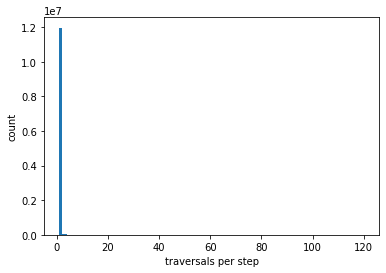

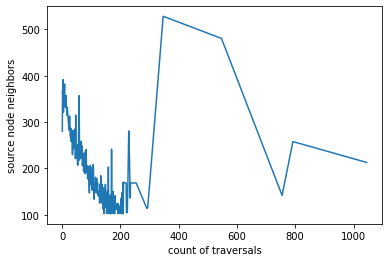

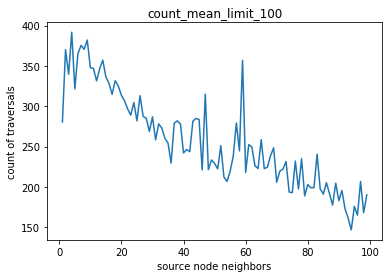

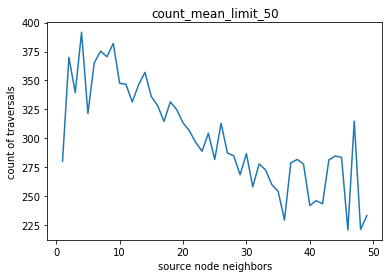

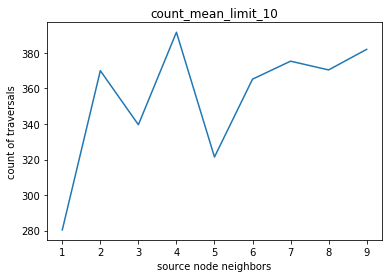

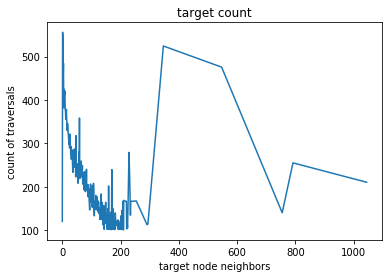

count mean
212.12318635842377
count max
1409
--  ---------  ---
20  0.917034   101
21  0.879617   106
22  0.847945   111
23  0.823586   116
24  0.781781   121
25  0.762896   126
26  0.742841   131
27  0.721667   136
28  0.700521   141
29  0.679298   146
30  0.65762    151
31  0.632867   156
32  0.604176   161
33  0.572083   166
34  0.541663   171
35  0.513592   176
36  0.490928   181
37  0.473832   186
38  0.46078    191
39  0.449052   196
40  0.436836   201
41  0.421485   206
42  0.403525   211
43  0.382528   216
44  0.359521   221
45  0.336209   226
46  0.312769   231
47  0.28939    236
48  0.266051   241
49  0.243558   246
50  0.222224   251
51  0.202585   256
52  0.184946   261
53  0.169534   266
54  0.157512   271
55  0.148238   276
56  0.141485   281
57  0.136338   286
58  0.132937   291
59  0.130322   296
60  0.128388   301
61  0.126527   306
62  0.124965   311
63  0.123774   316
64  0.122588   321
65  0.12163    326
66  0.120677   331
67  0.11984    336
68  0.119137   341
69  0

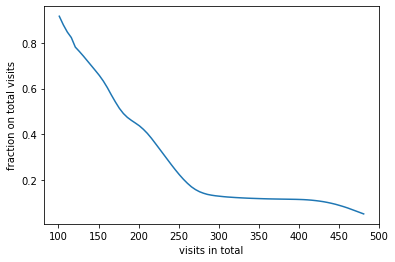

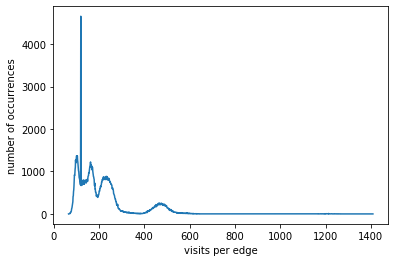

In [30]:
stats_analysis(dfe_120_80_1[0], dfe_120_80_1[1])

In [16]:
stat_analysis2(df_starting_nodes).fillna(0).sum(axis=1) / stat_analysis2(df_starting_nodes).count(axis=1)

(0, 1)        1.817204
(0, 10)       1.693662
(0, 100)      1.654362
(0, 101)      1.825279
(0, 102)      1.903915
                ...   
(999, 916)    1.039735
(999, 925)    1.025316
(999, 947)    1.044586
(999, 966)    1.053571
(999, 968)    1.069892
Length: 176468, dtype: float64

In [18]:
dfc = df_starting_nodes.count(axis=1)

In [22]:
dfc.mean()

172.17763560532222

In [20]:
dfs = df_starting_nodes.fillna(0).sum(axis=1)

In [23]:
dfs.mean()

210.58292154951607

In [52]:
dfc

(0, 1)        279
(0, 10)       284
(0, 100)      298
(0, 101)      269
(0, 102)      281
             ... 
(999, 916)    151
(999, 925)    158
(999, 947)    157
(999, 966)    168
(999, 968)    186
Length: 176468, dtype: int64

In [53]:
dfbc

(0, 1)        279
(0, 10)       284
(0, 100)      298
(0, 101)      269
(0, 102)      281
             ... 
(999, 916)    151
(999, 925)    158
(999, 947)    157
(999, 966)    168
(999, 968)    186
Length: 176468, dtype: int64

In [6]:
df = pd.read_json("data/stats_120_80_1.json")

In [8]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
df3 = df2.loc[~df2.index.str.contains("None")]
    


In [24]:
df_batches = pd.DataFrame(df3.batch_id.values.tolist(), index=df3.index.values)


In [48]:
dfbc = df_batches.count(axis=1)

In [50]:
dfbc.mean()

172.17763560532222

In [11]:
df_starting_nodes = pd.DataFrame(df3.starting_nodes.values.tolist(), index=df3.index.values)
# df_starting_nodes = df_starting_nodes.fillna(0)

In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df1 = pd.read_json("data/stats1.json")

In [ ]:
df128 = pd.read_json("data/stats_20_10_128.json")
df32 = pd.read_json("data/stats_20_10_32.json")
df1 = pd.read_json("data/stats_20_10_1.json")

In [ ]:
df_80_1024 = pd.read_json("data/stats_120_80_1024.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_64 = pd.read_json("data/stats_120_80_64.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")
df_80_1 = pd.read_json("data/stats_120_80_1.json")

In [ ]:
df_80_16000 = pd.read_json("data/stats_120_80_16000.json")

In [ ]:
df1 = pd.read_json("data/stats_20_20_1.json")
df16 = pd.read_json("data/stats_20_20_16.json")
df64 = pd.read_json("data/stats_20_20_64.json")

In [ ]:
df_80_131072 = pd.read_json("data/stats_120_80_131072.json")
df_80_65536 = pd.read_json("data/stats_120_80_65536.json")
df_80_2048 = pd.read_json("data/stats_120_80_2048.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")

In [29]:
df_120_80_64 = pd.read_json("data/stats_120_80_64.json")

In [35]:
df_120_80_64.stats

(0, 1)         {'count': 334, 'source_neighbors': 347, 'targe...
(0, 10)        {'count': 415, 'source_neighbors': 347, 'targe...
(0, 100)       {'count': 419, 'source_neighbors': 347, 'targe...
(0, 101)       {'count': 411, 'source_neighbors': 347, 'targe...
(0, 102)       {'count': 601, 'source_neighbors': 347, 'targe...
                                     ...                        
(999, 925)     {'count': 186, 'source_neighbors': 77, 'target...
(999, 947)     {'count': 154, 'source_neighbors': 77, 'target...
(999, 966)     {'count': 183, 'source_neighbors': 77, 'target...
(999, 968)     {'count': 253, 'source_neighbors': 77, 'target...
(999, None)    {'count': 120, 'source_neighbors': 77, 'target...
Name: stats, Length: 180507, dtype: object

In [36]:
df_120_80_64v2 = pd.DataFrame(df_120_80_64.stats.values.tolist(), index=df_120_80_64.index.values)

In [41]:
df_120_80_64v3 = df_120_80_64v2.loc[~df2.index.str.contains("None")]

In [43]:
dfa = df_120_80_64v3['count']/ df_120_80_64v3['target_neighbors']

In [45]:
dfa.mean()

7.364761683968151

In [27]:
df_20_10_1['stats']

(0, 10)        {'count': 1, 'source_neighbors': 347, 'target_...
(0, 102)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 103)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 104)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 107)       {'count': 1, 'source_neighbors': 347, 'target_...
                                     ...                        
(999, 1888)    {'count': 1, 'source_neighbors': 77, 'target_n...
(999, 925)     {'count': 2, 'source_neighbors': 77, 'target_n...
(999, 966)     {'count': 3, 'source_neighbors': 77, 'target_n...
(999, 968)     {'count': 3, 'source_neighbors': 77, 'target_n...
(999, None)    {'count': 20, 'source_neighbors': 77, 'target_...
Name: stats, Length: 146916, dtype: object

In [ ]:
stats_analysis(df1)

In [ ]:
stats_analysis(df_80_131072)

In [ ]:
stats_analysis(df_80_65536)

In [ ]:
stats_analysis(df_80_2048)

In [ ]:
stats_analysis(df_80_512)

In [ ]:
stats_analysis(df_80_128)

In [ ]:
stats_analysis(df_80_16)

In [ ]:
with open("data/stats.json") as datafile:
    data = json.load(datafile)


In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df = df128

In [ ]:
df.index.values

In [ ]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)

In [ ]:
df2.loc['(1096, 107)']

In [ ]:
df3 = df2.loc[~df2.index.str.contains("None")]

In [ ]:
df4 = df2.loc[df2.index.str.contains("None")]

In [ ]:
df3

In [ ]:
df3

In [ ]:
df3.time_access.values.tolist()

In [17]:
df_time_access = pd.DataFrame(dfe_120_80_1[1].time_access.values.tolist(), index=dfe_120_80_1[1].index.values)

In [18]:
df3.time_access.values.tolist()

NameError: name 'df3' is not defined

In [19]:
df_time_access = df_time_access.fillna(0)

In [20]:
df_time_access.idxmax()

17    (3980, 4017)
51    (3994, 3982)
2          (0, 11)
4       (414, 642)
19    (1918, 2381)
          ...     
5     (3980, 4001)
42    (3988, 3980)
65    (3982, 4003)
55    (3488, 3557)
52    (3980, 4008)
Length: 78, dtype: object

In [21]:
counts = df_time_access.values.flatten()


In [23]:
df_time_access

,17,51,2,4,19,21,37,57,11,46,...,70,73,75,32,62,5,42,65,55,52
"(0, 1)",1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 10)",1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 100)",1.0,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 101)",1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 102)",1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(999, 916)",1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
"(999, 925)",1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
"(999, 947)",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(999, 966)",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [24]:
counts

array([1., 1., 7., ..., 1., 1., 1.])

In [25]:
counts2 = counts[(counts>0) & (counts<120)]

In [27]:
counts2==1

array([ True,  True, False, ...,  True,  True,  True])

In [28]:
len(counts2[counts2==1])/len(counts2)

0.989142835972024

In [ ]:
ratios = []
for i in range(1, 11):
    ratios.append(len(counts2[counts2==i])/len(counts2))

In [ ]:
step_groupings = []
for i in range(1, 21):
    step_groupings.append((i, sum(counts2[counts2>i])/sum(counts2)))

In [ ]:
step_groupings = np.array(step_groupings)
l1, l2 = zip(*step_groupings)

In [ ]:
step_groupings

In [ ]:


step_groupings_pd = pd.DataFrame()
step_groupings_pd['bound'] = l1
step_groupings_pd['fraction'] = l2

plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.bar(range(1,11), np.array(ratios))
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.hist(counts2, bins=int(max(counts2)))
plt.xlabel("traversals per step")
plt.ylabel("count")

In [ ]:
plt.plot(df2.groupby('source_neighbors').mean()['count'])
plt.xlabel("count of traversals")
plt.ylabel("source node neighbors")

In [ ]:
count_mean = df2.groupby('source_neighbors').mean()['count']

In [ ]:
count_mean

In [ ]:
count_mean_limit_100 = count_mean[count_mean.index < 100]
count_mean_limit_50 = count_mean[count_mean.index < 50]
count_mean_limit_10 = count_mean[count_mean.index < 10]

In [ ]:
plt.plot(count_mean_limit_100)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_50)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_10)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(df2.groupby('target_neighbors').mean()['count'])
plt.ylabel("count of traversals")
plt.xlabel("target node neighbors")

In [ ]:
df2['count'].mean()

In [ ]:
df2['count'].median()

In [ ]:
max(df2['count'])

In [35]:
sn_group = dfe[1].groupby('sn').size()

In [43]:
sn_group

sn
1         75
2        196
3        279
4        396
5        465
        ... 
347      347
547      547
755      755
792      792
1045    1045
Length: 227, dtype: int64

In [50]:
sum(sn_group[sn_group.index >= 50])

122577

In [29]:
dfe[1].groupby('sn')

,c,sn,tn,ta
"(0, 1)",170,347,17,"{'6': 1.0, '47': 1.0, '93': 1.0, '58': 1.0, '8..."
"(0, 10)",130,347,10,"{'31': 1.0, '43': 1.0, '75': 1.0, '77': 1.0, '..."
"(0, 100)",160,347,9,"{'42': 1.0, '4': 1.0, '59': 1.0, '68': 1.0, '2..."
"(0, 101)",165,347,19,"{'64': 1.0, '26': 1.0, '47': 1.0, '40': 1.0, '..."
"(0, 102)",160,347,6,"{'47': 1.0, '88': 1.0, '16': 1.0, '57': 1.0, '..."
...,...,...,...,...
"(999, 916)",38,77,147,"{'81': 1.0, '44': 1.0, '30': 1.0, '38': 1.0, '..."
"(999, 925)",68,77,167,"{'98': 1.0, '49': 1.0, '57': 1.0, '91': 1.0, '..."
"(999, 947)",54,77,115,"{'39': 1.0, '98': 1.0, '84': 1.0, '79': 1.0, '..."
"(999, 966)",47,77,115,"{'33': 1.0, '52': 1.0, '70': 1.0, '36': 1.0, '..."


In [23]:
count_groups = dfe[1].groupby('c').size()


In [41]:
count_groups

c
7      1
8      2
9      2
10     2
11     5
      ..
534    1
535    1
546    2
552    1
563    1
Length: 451, dtype: int64

In [25]:
sum(count_groups) # how many edges there is

176468

In [ ]:
sum(count_groups[count_groups.index >= i]) # how many edges where number of visis were greater than i

In [ ]:
groupings_percentages = []
for i in range(1, max(df2['count']), 5):
    groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))

In [ ]:
groupings_percentages = np.array(groupings_percentages)
l1, l2 = zip(*groupings_percentages)


In [ ]:
pd_groupings = pd.DataFrame()
pd_groupings['fraction'] = l2
pd_groupings['bound'] = l1

In [ ]:
max(count_groups)

In [ ]:
pd_groupings

In [ ]:
pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]

In [ ]:
pd_groupings_sig

In [ ]:
plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
plt.xlabel("visits in total")
plt.ylabel("fraction on total visits")

In [ ]:
plt.plot(df2.groupby('count').size())

In [ ]:
count_groups = df2.groupby('count').size()
count_groups_500 = count_groups[count_groups < 500]

In [ ]:
count_groups[count_groups < 10]

In [ ]:
bins = range(0, max(df2['count']), 10)
pd.cut(count_groups, bins)

In [ ]:
plt.plot(count_groups_500)

In [ ]:
cut_df = pd.cut(count_groups, bins).to_frame()

In [ ]:
cut_df.groupby(0).size().head(20)

In [ ]:
df_three_32_100_2_0 = read_df("data_exp/three_count_32_100_0.json")
df_three_32_100_2_02 = read_df("data_exp/three_count_32_100_0.2.json")
df_three_32_100_2_04 = read_df("data_exp/three_count_32_100_0.4.json")
df_three_32_100_2_06 = read_df("data_exp/three_count_32_100_0.6.json")
df_three_32_100_2_08 = read_df("data_exp/three_count_32_100_0.8.json")

In [124]:
df_three_32_100_2_0.var()

data    7.168704
dtype: float64

In [125]:
df_three_32_100_2_06.var()

data    10.13535
dtype: float64

In [102]:
df_four_32_100_2_08.sum()

data    12407808
dtype: int64

In [103]:
df_four_32_100_2_0.sum()

data    12407808
dtype: int64

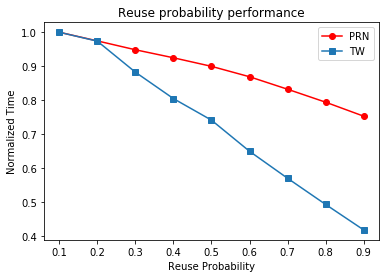

In [116]:
import matplotlib.pyplot as plt

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

y = [1386606/1386606, 1351294/1386606,  1315212/1386606, 1282580/1386606, 1247677/1386606, 1205289/1386606, 1154402/1386606, 1101658/1386606, 1044618/1386606]



x1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

y1= [247720/247720, 241226/247720, 218654/247720, 199423/247720, 183737/247720, 161080/247720, 141432/247720, 122394/247720, 103839/247720]

plt.plot(x,y,'r', marker='o',label="PRN")
plt.plot(x1,y1, marker='s', label="TW")
plt.ylabel('Normalized Time')
plt.xlabel('Reuse Probability')
plt.legend()
plt.title("Reuse probability performance")
plt.savefig("rp_plot.pdf")
